In [574]:
import os
cwd = os.getcwd()
print(cwd)

/Users/user/Desktop


In [576]:
os.chdir('/Users/user/desktop')

In [577]:
import xlrd

In [578]:
loc = ("RNAseqdata.xls") #this function imports our data and allows to manipulate in the following function

In [579]:
wb = xlrd.open_workbook(loc)

In [580]:
sheet = wb.sheet_by_index(0)

In [581]:
sheet.cell_value(1,4)

31.086206

In [582]:
print (sheet.nrows)

16103


In [583]:
import pandas as pd
xl = pd.ExcelFile("RNAseqdata.xls")


In [584]:
cols = ['NAME', 'SCORE']
cols 
df = xl.parse("RNAseq")
df.drop('DESCRIPTION', axis =1, inplace = True)
df.drop('GENE_SYMBOL', axis =1, inplace = True)
df.drop('GENE_TITLE', axis =1, inplace = True)
df

,NAME,SCORE
0,CD53,31.086206
1,PIM2,30.288067
2,NSF,29.087437
3,PSAT1,28.312407
4,MTHFD2,26.850730
...,...,...
16097,F10,-34.502815
16098,PIK3C2G,-34.909992
16099,D930015E06RIK,-38.306778
16100,PLAC8,-39.212330


In [585]:
df = df.sort_values(by=['SCORE'])

In [586]:
df #this function arraged our list to output top 5 genes with the highest score and the top 5 genes with the lowest score 

,NAME,SCORE
16101,NEAT1,-44.626900
16100,PLAC8,-39.212330
16099,D930015E06RIK,-38.306778
16098,PIK3C2G,-34.909992
16097,F10,-34.502815
...,...,...
4,MTHFD2,26.850730
3,PSAT1,28.312407
2,NSF,29.087437
1,PIM2,30.288067


In [587]:
df_high = df[df['SCORE'] >= 10] #based upon the literature 

In [588]:
print (df_high [['NAME', 'SCORE']])

        NAME      SCORE
610    SYNE3  10.003552
609   CRYZL1  10.004596
608  SMARCA5  10.007616
607     NIP7  10.013830
606    NDC80  10.020450
..       ...        ...
4     MTHFD2  26.850730
3      PSAT1  28.312407
2        NSF  29.087437
1       PIM2  30.288067
0       CD53  31.086206

[611 rows x 2 columns]


In [589]:
import matplotlib.pyplot as plt 
import numpy as np 
from matplotlib.ticker import StrMethodFormatter

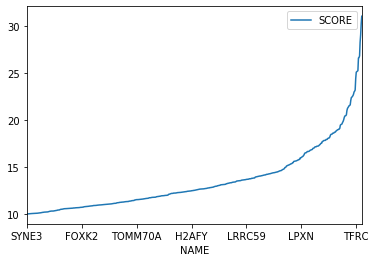

In [590]:
df_high.plot(x='NAME', y='SCORE')

In [591]:
df_low = df[df['SCORE'] <= -1] 

In [592]:
print (df_low [['NAME', 'SCORE']])

                NAME      SCORE
16101          NEAT1 -44.626900
16100          PLAC8 -39.212330
16099  D930015E06RIK -38.306778
16098        PIK3C2G -34.909992
16097            F10 -34.502815
...              ...        ...
11248          GPR88  -1.001812
11247          SH2D7  -1.001059
11246          PPM1B  -1.000857
11245         MUSTN1  -1.000829
11244          ENOX1  -1.000694

[4858 rows x 2 columns]


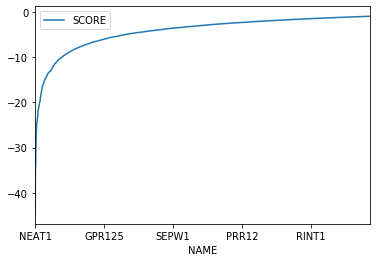

In [593]:
df_low.plot(x='NAME', y='SCORE')

In [594]:
import pandas as pd
xl = pd.ExcelFile("RNAseqdata.xls")

In [595]:
cols = ['Symbol']
df = xl.parse("UPR")
df

,Symbol
0,ACADVL
1,ADD1
2,ARFGAP1
3,ASNS
4,ATF3
...,...
74,WFS1
75,WIPI1
76,XBP1
77,YIF1A


In [596]:
df_upr = xl.parse("UPR")

In [597]:
print (df_upr)

     Symbol
0    ACADVL
1      ADD1
2   ARFGAP1
3      ASNS
4      ATF3
..      ...
74     WFS1
75    WIPI1
76     XBP1
77    YIF1A
78   ZBTB17

[79 rows x 1 columns]


In [598]:
from pandas import ExcelWriter
writer = pd.ExcelWriter('UpregulatedMatch.xlsx')
df_upr.to_excel(writer,'one', startrow=0 , startcol=0)
df_high.to_excel(writer,'one', startrow=0, startcol=2)
writer.save()

In [599]:
import pandas as pd
df = pd.read_excel('UpregulatedMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
12,CXCL8,EXOSC2,10.054875
58,PDIA6,DNAJB11,10.422532
81,NaN,EIF2S1,10.598577
188,NaN,EXOSC8,11.372314
214,NaN,ATF6,11.616917
232,NaN,PDIA6,11.781059
257,NaN,HYOU1,12.013284
514,NaN,ATF4,16.686472
601,NaN,ASNS,25.177706


In [600]:
from pandas import ExcelWriter

writer = ExcelWriter('UpGraph.xlsx')
result.to_excel(writer,'one',index=False)
writer.save()

In [601]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

Text(0, 1.12, 'UPR vs. RNASeq Matching Upregulated Genes')

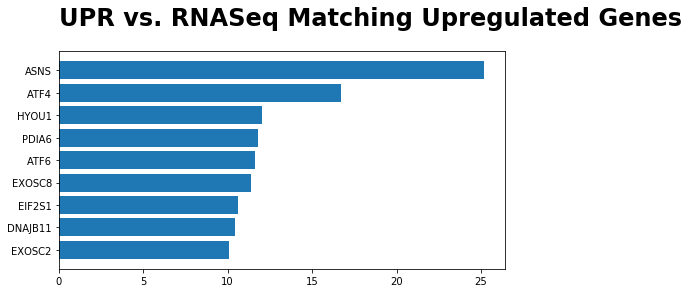

In [602]:
df = pd.read_excel('UpGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'UPR vs. RNASeq Matching Upregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')


In [603]:
from pandas import ExcelWriter
writer = pd.ExcelWriter('DownregulatedMatch.xlsx')
df_upr.to_excel(writer,'one', startrow=0 , startcol=0)
df_low.to_excel(writer,'one', startrow=0, startcol=2)
writer.save()

In [604]:
import pandas as pd
df = pd.read_excel('DownregulatedMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
61,PREB,ERN1,-20.256012
455,NaN,TPP1,-9.285360
898,NaN,PLA2G4B,-6.491310
1230,NaN,ADD1,-5.280332
1542,NaN,ATP6V0D1,-4.512323
1609,NaN,TSPYL2,-4.336701
1614,NaN,DNAJB9,-4.331062
1704,NaN,CTDSP2,-4.146607
1802,NaN,CUL7,-3.983062
4428,NaN,ACADVL,-1.242801


In [605]:
from pandas import ExcelWriter

writer = ExcelWriter('DownGraph.xlsx')
result.to_excel(writer,'one',index=False)
writer.save()

Text(0, 1.12, 'UPR vs. RNASeq Matching Downregulated Genes')

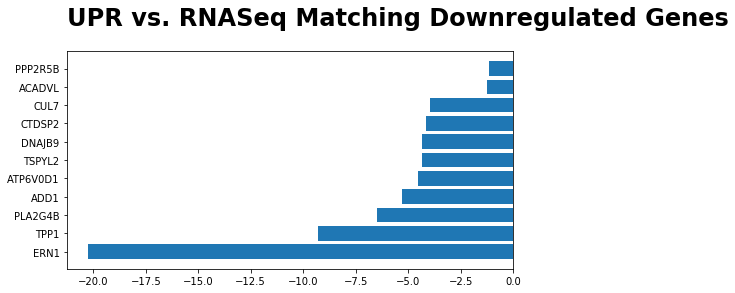

In [606]:
df = pd.read_excel('DownGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'UPR vs. RNASeq Matching Downregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')

In [607]:
cols = ['Symbol']
df = xl.parse("Gly")
df

,Symbol
0,ABCB1
1,ACLY
2,ACMSD
3,ACP1
4,ADA
...,...
80,TSC1
81,UCA1
82,UCP3
83,VEGFA


In [608]:
df_Gly = xl.parse("Gly")


In [609]:
print (df_Gly)

   Symbol
0   ABCB1
1    ACLY
2   ACMSD
3    ACP1
4     ADA
..    ...
80   TSC1
81   UCA1
82   UCP3
83  VEGFA
84    VHL

[85 rows x 1 columns]


In [610]:
writer = pd.ExcelWriter('GlyUpMatch.xlsx')
df_Gly.to_excel(writer,'Sheet1', startrow=0 , startcol=0)
df_high.to_excel(writer,'Sheet1', startrow=0, startcol=2)
writer.save()

In [611]:
df = pd.read_excel('GlyUpMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
88,NaN,ACP1,10.655144
354,NaN,C1QBP,13.114568
403,NaN,PCNA,13.705776
406,NaN,PFKP,13.754307
426,NaN,MTDH,14.049484
497,NaN,ENO1,15.826998
507,NaN,TGFB1,16.503178
510,NaN,GAPDH,16.606325
521,NaN,SLC2A3,16.992449
522,NaN,BIRC5,17.017273


In [612]:
writer = ExcelWriter('GlyUpGraph.xlsx')
result.to_excel(writer,'Sheet1',index=False)
writer.save()

Text(0, 1.12, 'Gly vs. RNASeq Matching Upregulated Genes')

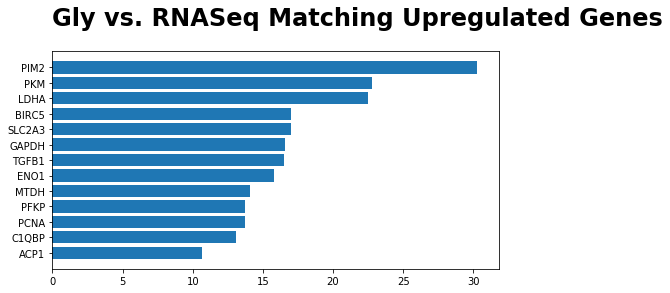

In [613]:
df = pd.read_excel('GlyUpGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'Gly vs. RNASeq Matching Upregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')

In [614]:
writer = pd.ExcelWriter('GlyDownMatch.xlsx')
df_Gly.to_excel(writer,'Sheet1', startrow=0 , startcol=0)
df_low.to_excel(writer,'Sheet1', startrow=0, startcol=2)
writer.save()

In [615]:
df = pd.read_excel('GlyDownMatch.xlsx')
df.drop(df.columns[df.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
result = df[df['NAME'].isin(list(df['Symbol']))]
result

,Symbol,NAME,SCORE
252,NaN,MLXIP,-12.262503
357,NaN,PTEN,-10.370646
989,NaN,PFKFB2,-6.107767
1081,NaN,CASP1,-5.765456
1231,NaN,FOXO3,-5.278526
1633,NaN,UCP3,-4.293165
1706,NaN,GAPDHS,-4.144747
2422,NaN,TSC1,-3.027697
2893,NaN,IDH1,-2.471252
3008,NaN,BRAF,-2.364711


In [616]:
writer = ExcelWriter('GlyDownGraph.xlsx')
result.to_excel(writer,'Sheet1',index=False)
writer.save()

Text(0, 1.12, 'Gly vs. RNASeq Matching Downregulated Genes')

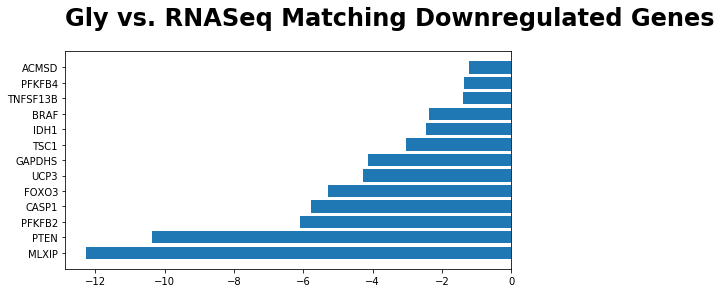

In [617]:
df = pd.read_excel('GlyDownGraph.xlsx', usecols =['NAME', 'SCORE'])
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(df['NAME'], df['SCORE'])
ax.text(0, 1.12, 'Gly vs. RNASeq Matching Downregulated Genes',
            transform=ax.transAxes, size=24, weight=600, ha='left')